In [1]:
import os
import sys

import pandas as pd
# import pandas_datareader.data as web
import numpy as np

import statsmodels.api as stm
from statsmodels.tsa import ar_model, arima_process, arima, arima_model

import matplotlib.pyplot as plt
import matplotlib as mpl

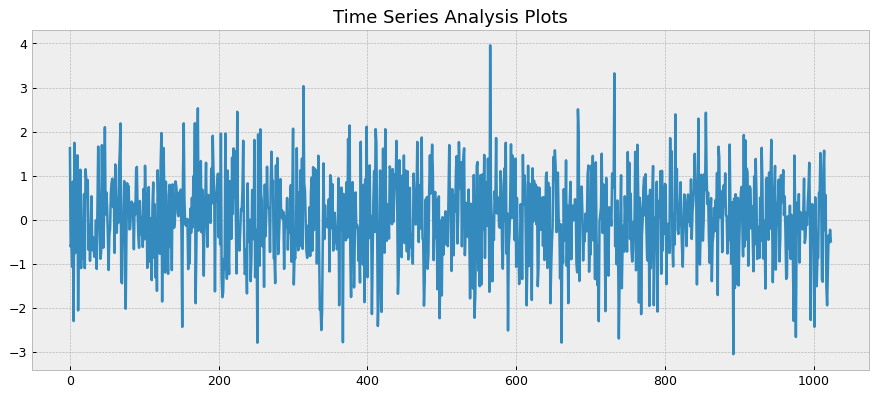

In [2]:
#http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016
def tsplot(y, lags=None, style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=(12, 5), dpi=90)
        layout = (1, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
#        acf_ax = plt.subplot2grid(layout, (1, 0))
#        pacf_ax = plt.subplot2grid(layout, (1, 1))        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
#        statsmodels.graphics.tsaplots.plot_acf (y, lags=lags, ax=acf_ax, alpha=0.5)
#        statsmodels.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

#         plt.tight_layout()
    return 

n_samples = int(1024)
nlag = 27 
np.random.seed(1)

# plot of discrete white noise
randser = np.random.normal(size=n_samples)
#randser = randser.flatten()
tsplot(randser, lags=nlag)

## Autoregressive Models - AR(p) 

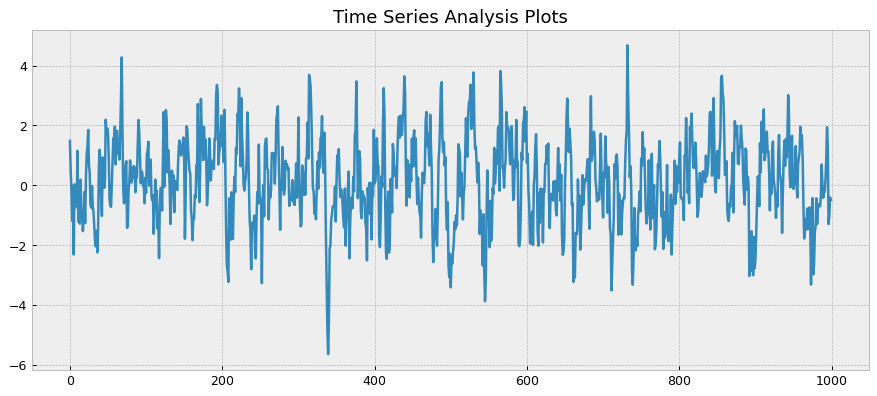

In [3]:
np.random.seed(1)

a = 0.74
n_samples = 1000
x = w = np.random.normal(size=n_samples)

for t in range(n_samples):
    x[t] = a*x[t-1] + w[t]
    
tsplot(x)

In [4]:
mdl = ar_model.AutoReg(x, lags=30,  trend='n', old_names=False)
results = mdl.fit()

est_order = ar_model.ar_select_order(x, maxlag=30, ic='aic', trend='n', old_names=False)

true_order = 1
print(f'\nalpha estimate: {results.params[0]:3.5f} | best lag order = {est_order.ar_lags[0]}')
print(f'\ntrue alpha = {a} | true order = {true_order}')


alpha estimate: 0.72923 | best lag order = 1

true alpha = 0.74 | true order = 1


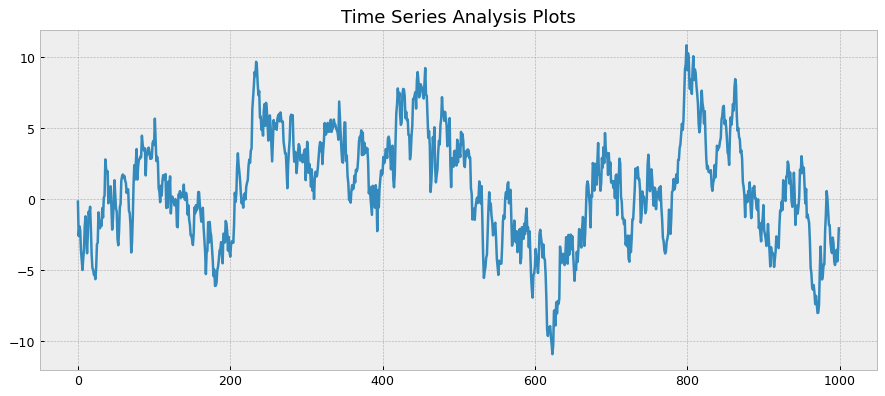

In [5]:
# Simulate an AR(2) process

alphas = np.array([.93, .0333])
betas = np.array([0.])

# Python requires us to specify the zero-lag value which is 1
# Also note that the alphas for the AR model must be negated
# We also set the betas for the MA equal to 0 for an AR(p) model
# For more information see the examples at statsmodels.org
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ar2 = arima_process.arma_generate_sample(ar=ar, ma=ma, nsample=n_samples) 
_ = tsplot(ar2, lags=nlag)

In [6]:
max_lag = 10

mdl = ar_model.AutoReg(ar2, lags=10, trend='n', old_names=False)
results = mdl.fit()

est_order = ar_model.ar_select_order(ar2, maxlag=10, ic='aic', trend='n', old_names=False)

true_order = 2
print(f'\ncoef estimate: {results.params[0]:3.4f} {results.params[2]:3.4f} | best lag order = {est_order.ar_lags[0]}')
print(f'\ntrue coefs = {alphas} | true order = {true_order}')


coef estimate: 0.9410 0.0064 | best lag order = 1

true coefs = [0.93   0.0333] | true order = 2


## Moving Average Models - MA(q) 

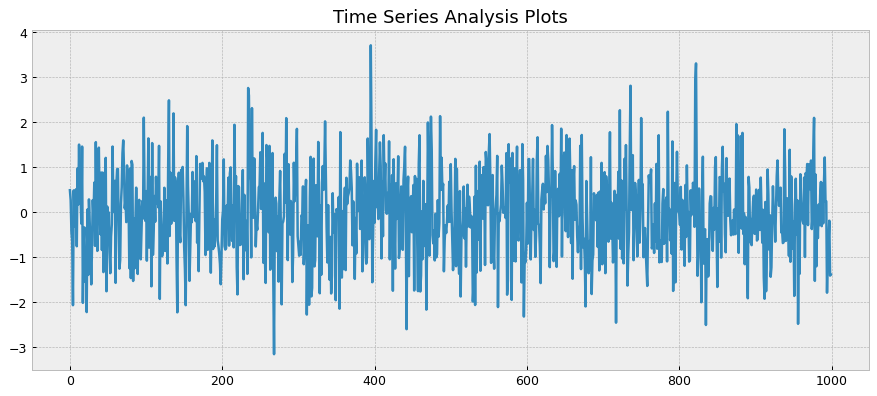

In [7]:
# Simulate an MA(1) process

n = 1000

# set the AR(p) alphas equal to 0
alphas = np.array([0.])
betas = np.array([0.06])

# add zero-lag and negate alphas
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ma1 = arima_process.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
_ = tsplot(ma1, lags=nlag)

In [8]:
# Fit the MA(1) model to our simulated time series
# Specify ARMA model with order (p, q)

max_lag = 30

mdl = arima.model.ARIMA(ma1, order=(0, 0, 1), trend='n')
results = mdl.fit(method='innovations_mle')

print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1389.943
Date:                Wed, 06 Oct 2021   AIC                           2783.886
Time:                        10:18:35   BIC                           2793.702
Sample:                             0   HQIC                          2787.617
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0287      0.031      0.937      0.349      -0.031       0.089
sigma2         0.9437      0.042     22.227      0.000       0.860       1.027
Ljung-Box (L1) (Q):                   0.00   Jarque-

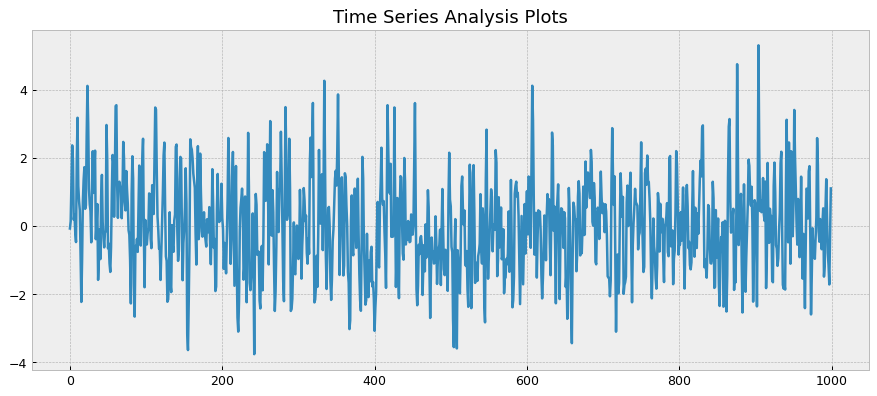

In [9]:
# Simulate MA(3) process with betas 0.6, 0.4, 0.2

alphas = np.array([0.])
betas = np.array([0.93, 0.06, -0.03])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

ma3 = arima_process.arma_generate_sample(ar=ar, ma=ma, nsample=n_samples)
tsplot(ma3, lags=nlag)

In [10]:
# Fit the MA(1) model to our simulated time series
# Specify ARMA model with order (p, q)

max_lag = 30

mdl = arima.model.ARIMA(ma3, order=(0, 0, 3), trend='n')
results = mdl.fit(method='innovations_mle')

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1428.181
Date:                Wed, 06 Oct 2021   AIC                           2864.363
Time:                        10:18:37   BIC                           2883.994
Sample:                             0   HQIC                          2871.824
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9318      0.030     30.798      0.000       0.872       0.991
ma.L2          0.0742      0.044      1.669      0.095      -0.013       0.161
ma.L3         -0.0237      0.033     -0.729      0.4

## Autoregressive Moving Average Models - ARMA(p, q) 

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4096
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -6559.812
Date:                Wed, 06 Oct 2021   AIC                          13129.624
Time:                        10:18:43   BIC                          13161.213
Sample:                             0   HQIC                         13140.808
                               - 4096                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0749      0.143      0.524      0.601      -0.205       0.355
ar.L2         -0.0267      0.046     -0.575      0.565      -0.118       0.064
ma.L1          0.4983      0.143      3.483      0.0

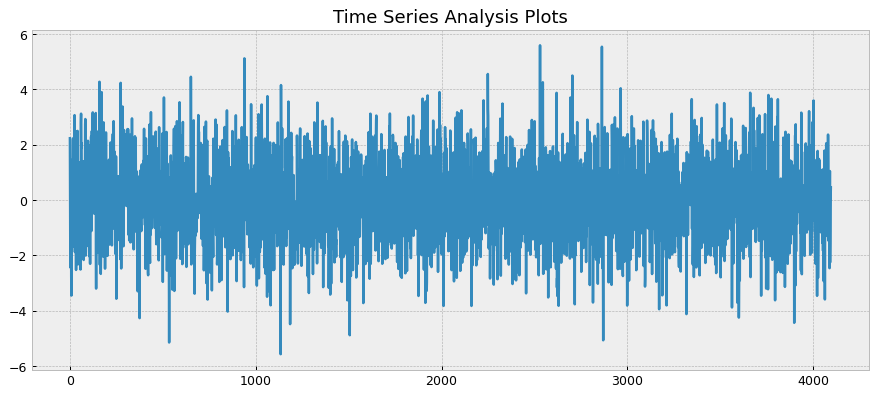

In [11]:
# Simulate an ARMA(2, 2) model
max_lag = nlag

n_samples = int(4096) # lots of samples to help estimates
burn = int(n_samples/10) # number of samples to discard before fit

alphas = np.array([0.03, -0.03])
betas = np.array([0.93, -0.33])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

arma22 = arima_process.arma_generate_sample(ar=ar, ma=ma, nsample=n_samples, burnin=burn)
_ = tsplot(arma22, lags=max_lag)

mdl = arima.model.ARIMA(arma22, order=(2, 0, 2), trend='n')
results = mdl.fit(method='innovations_mle')

print(results.summary())

aic: 14244.67364 | order: (4, 2)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5000
Model:                 ARIMA(4, 0, 2)   Log Likelihood               -7115.337
Date:                Wed, 06 Oct 2021   AIC                          14244.674
Time:                        10:18:54   BIC                          14290.294
Sample:                             0   HQIC                         14260.663
                               - 5000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2820      0.100      2.809      0.005       0.085       0.479
ar.L2         -0.1916      0.028     -6.903      0.000      -0.246      -0.137
ar.L3          0.37

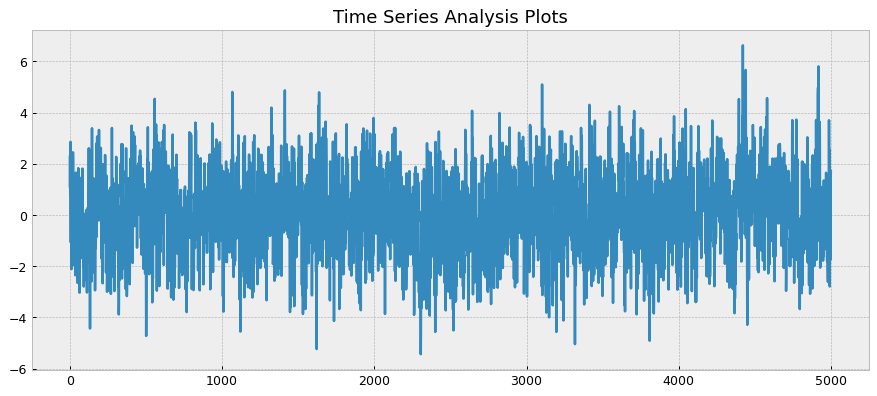

In [12]:
# Simulate an ARMA(3, 2) model with alphas=[0.5,-0.25,0.4] and betas=[0.5,-0.3]

max_lag = 30

n = 5000
burn = 2000

alphas = np.array([0.5, -0.25, 0.4])
betas = np.array([0.5, -0.3])

ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

arma32 = arima_process.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=burn)
tsplot(arma32, lags=max_lag)

# pick best order by aic 
# smallest aic value wins
best_aic = np.inf 
best_order = None
best_mdl = None

rng = range(5)
for i in rng:
    for j in rng:

        try:
            tmp_mdl = arima.model.ARIMA(arma32, order=(i, 0, j), trend='n')
            results = tmp_mdl.fit(method='innovations_mle')        
        
            tmp_aic = results.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
                best_results = results
        except:
            continue


print(f'aic: {best_aic:6.5f} | order: {best_order}')
print(best_results.summary())